### Model training and validation

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Matplotlib defaults

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

TNRFONT = {'fontname':'Times New Roman'} # change font style

In [3]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

In [4]:
X=X/255.0

In [5]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(32))
model.add(Dense(46))
model.add(Activation("softmax"))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model_design = model.fit(X, y, batch_size=16, epochs=10, validation_split=0.25)

Train on 6900 samples, validate on 2300 samples
Epoch 1/10
6900/6900 [==============================] - 13s 2ms/sample - loss: 1.8363 - accuracy: 0.5084 - val_loss: 0.7839 - val_accuracy: 0.7783
Epoch 2/10
6900/6900 [==============================] - 13s 2ms/sample - loss: 0.4514 - accuracy: 0.8790 - val_loss: 0.4287 - val_accuracy: 0.8935
Epoch 3/10
6900/6900 [==============================] - 13s 2ms/sample - loss: 0.1890 - accuracy: 0.9517 - val_loss: 0.4305 - val_accuracy: 0.9078
Epoch 4/10
6900/6900 [==============================] - 13s 2ms/sample - loss: 0.1342 - accuracy: 0.9677 - val_loss: 0.3268 - val_accuracy: 0.9287
Epoch 5/10
6900/6900 [==============================] - 13s 2ms/sample - loss: 0.0909 - accuracy: 0.9804 - val_loss: 0.3142 - val_accuracy: 0.9378
Epoch 6/10
6900/6900 [==============================] - 15s 2ms/sample - loss: 0.0734 - accuracy: 0.9838 - val_loss: 0.3400 - val_accuracy: 0.9322
Epoch 7/10
6900/6900 [==============================] - 15s 2ms/sample

In [8]:
model.save('Traffic_Sign_Signal_pred_model_Final.h5')

In [9]:
X_train, X_val = X[:6901], X[6901:]
y_train, y_val = y[:6901], y[6901:]

In [10]:
_, train_acc = model.evaluate(X_train, y_train, verbose = 0)
_, val_acc = model.evaluate(X_val, y_val, verbose = 0)
print('Train accuracy : %.3f, Validation accuracy : %.3f' % (train_acc*100, val_acc*100))

Train accuracy : 99.681, Validation accuracy : 96.085


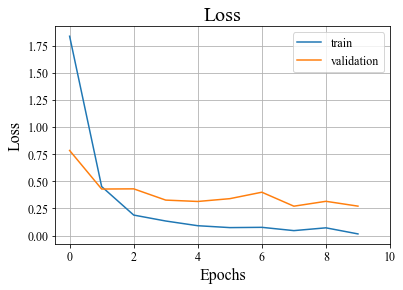

In [11]:
plt.title('Loss', fontsize= BIGGER_SIZE, **TNRFONT)
plt.plot(model_design.history['loss'], label = 'train')
plt.plot(model_design.history['val_loss'], label = 'validation')
plt.legend(prop={'family':'Times New Roman'})
plt.xticks(np.arange(0, 12, 2), **TNRFONT)
plt.yticks(**TNRFONT)
plt.ylabel('Loss', **TNRFONT)
plt.xlabel('Epochs', **TNRFONT)
plt.grid()
plt.show()

In [12]:
train_accuracy_list = np.array(model_design.history['accuracy'])*100

In [13]:
val_accuracy_list = np.array(model_design.history['val_accuracy'])*100

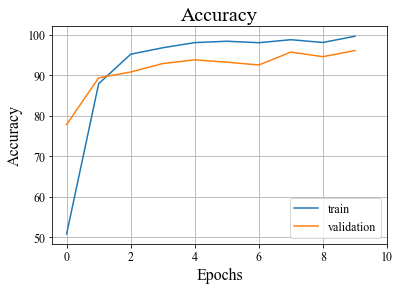

In [14]:
plt.title('Accuracy', fontsize= BIGGER_SIZE, **TNRFONT)
plt.plot(train_accuracy_list, label='train')
plt.plot(val_accuracy_list, label='validation')
plt.legend(prop={'family':'Times New Roman',})
plt.xticks(np.arange(0, 12, 2), **TNRFONT)
plt.yticks(**TNRFONT)
plt.ylabel('Accuracy', **TNRFONT)
plt.xlabel('Epochs', **TNRFONT)
plt.grid()
plt.show()